I used ChatGPT-4o for this entire notebook

**Prompt:**
we will be using a credit card fraud dataset and the goal of the notebook to learn how to find business insights by exploring data, wrangling data, and  modeling data

first we will need a markdown cell with a title, me listed as the author, MAT 311 as the class name, today's date for when it was updated, and a short paragraph welcoming us to the class and introducing the notebook and the goals of the notebook

# First Day of Data Science with Python  
**Author:** Katelyn Creek  
**Class:** MAT 311  
**Last Updated:** December 4, 2024  

---

### Welcome!  
Welcome to this notebook for MAT 311. Today marks the beginning of our journey into data science, where we will use Python as our primary tool for analysis and discovery. The primary goals of this notebook are to:

1. Explore the dataset to uncover key patterns and insights.  
2. Wrangle the data to prepare it for analysis and modeling.  
3. Build and evaluate models to detect fraudulent transactions.  

By the end of this notebook, we aim to not only understand the technical aspects of data science but also learn how to apply these skills to solve real-world problems. Let's get started!


**Prompt:**
next we need a markdown cell about the context of our data. our data is from https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data. give a table with all the features of the data with a description of each feature. The features are  are distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, fraud

# Dataset Context: Credit Card Fraud Detection  

### Overview  
The dataset used in this notebook is sourced from [Kaggle's Credit Card Fraud Dataset](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data). This dataset includes information about various transactions and associated features that can help in detecting fraudulent behavior. The goal is to use these features to classify transactions as fraudulent or legitimate.  

### Features and Descriptions  

| **Feature**                       | **Description**                                                                                   |
|------------------------------------|---------------------------------------------------------------------------------------------------|
| **distance_from_home**             | The distance between the transaction location and the cardholder's home location.                |
| **distance_from_last_transaction** | The distance between the location of the current transaction and the previous transaction.       |
| **ratio_to_median_purchase_price** | The ratio of the transaction amount to the median purchase price for the cardholder.             |
| **repeat_retailer**                | Indicates whether the transaction was made at a retailer previously visited by the cardholder.   |
| **used_chip**                      | Indicates whether a chip was used during the transaction (1 = Yes, 0 = No).                     |
| **used_pin_number**                | Indicates whether a PIN number was used during the transaction (1 = Yes, 0 = No).               |
| **online_order**                   | Indicates whether the transaction was made online (1 = Yes, 0 = No).                            |
| **fraud**                          | Target variable indicating if a transaction is fraudulent (1 = Fraudulent, 0 = Legitimate).     |

---

This dataset provides a realistic context for understanding the challenges of fraud detection, such as imbalanced data and feature engineering. Let’s move forward to explore the data in detail!


**Prompt:** 
our next section is about loading our libraries. give me a markdown cell with a title for this section

# Loading the Required Libraries  


**Prompt:**
give me python code that imports pandas, Seaborn, matplotlib.pyplot, plotly.express, train test split, standard scaler, knn classifier, confusion matrix, classification report, accuracy, precision, recall, and f1

In [1]:
# Importing libraries for data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Importing tools for data splitting and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing machine learning model and evaluation metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


**Prompt:** 
our next section is about loading the data. give me a markdown cell with a title for this section

# Loading the Dataset  

**Prompt:** 
give me python code that reads the file card_transdata.csv and displays the head of the dataframe

In [2]:
# Load the dataset and display the first few rows
data = pd.read_csv('card_transdata.csv')
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
1,10.829943,0.175592,1.294219,1.0,NaN,0.0,0.0,0
2,5.091079,NaN,0.427715,1.0,0.0,0.0,1.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0


**Prompt:**
find the shape of the dataframe

In [3]:
# Display the shape of the dataframe
data.shape

(999, 8)

**Prompt:**
get the info of the dataframe

In [4]:
# Display information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


**Prompt:**
python code that describes the dataset

In [5]:
# Display descriptive statistics of the dataset
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,999.000000,996.000000,997.000000,992.000000,995.000000,997.000000,995.000000,999.000000
mean,26.876607,5.437319,1.655069,0.892137,0.313568,0.117352,0.673367,0.079079
std,63.899697,35.668094,2.351386,0.310364,0.464176,0.322001,0.469218,0.269997
min,0.104184,0.001448,0.016933,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.990543,0.306441,0.468123,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.340321,0.958539,0.955504,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.393952,3.137259,1.922025,1.000000,1.000000,0.000000,1.000000,0.000000
max,965.910612,990.070315,36.074366,1.000000,1.000000,1.000000,1.000000,1.000000


**Prompt:**
our next section is wrangling the data

# Wrangling the Data  

**Prompt:**
find the null values in the dataframe

In [6]:
# Check for null values in the dataframe
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64

**Prompt:**
write a couple sentences about dropping the missing values because there are not that many rows with missing values

Since the dataset has only a few rows with missing values, we can safely drop these rows without significantly affecting the analysis. This approach ensures that the remaining data is complete and avoids introducing potential biases from imputation methods.

**Prompt:**
drop the null values and print the shape of the new dataframe

In [7]:
# Drop rows with null values
data_cleaned = data.dropna()

# Print the shape of the new dataframe
data_cleaned.shape

(977, 8)

**Prompt:**
print the head of the cleaned datafreame

In [8]:
# Display the first few rows of the cleaned dataframe
data_cleaned.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0


**Prompt:**
the next section is visualizing the data

# Visualizing the Data  

**Prompt:**
create a count plot of fraud with a title

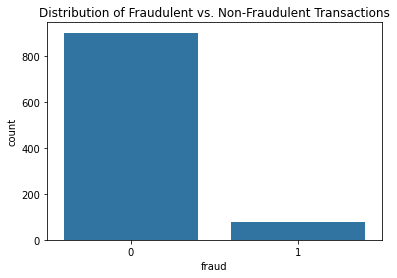

In [9]:
# Create a count plot for the 'fraud' column
sns.countplot(x='fraud', data=data_cleaned)

# Adding a title to the plot
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')

# Display the plot
plt.show()


**Prompt:**
create a count plot of used_pin_number with a title

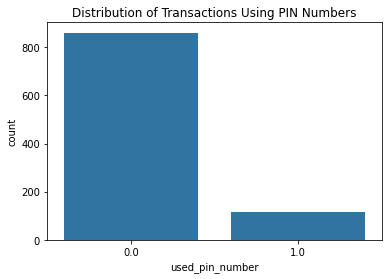

In [10]:
# Create a count plot for the 'used_pin_number' column
sns.countplot(x='used_pin_number', data=data_cleaned)

# Adding a title to the plot
plt.title('Distribution of Transactions Using PIN Numbers')

# Display the plot
plt.show()

**Prompt:**
create a count plot of repeat_retailer with a title

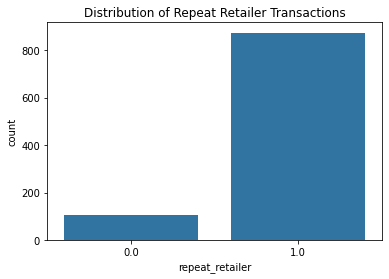

In [11]:
# Create a count plot for the 'repeat_retailer' column
sns.countplot(x='repeat_retailer', data=data_cleaned)

# Adding a title to the plot
plt.title('Distribution of Repeat Retailer Transactions')

# Display the plot
plt.show()

**Prompt:**
create a count plot of used_chip with a title

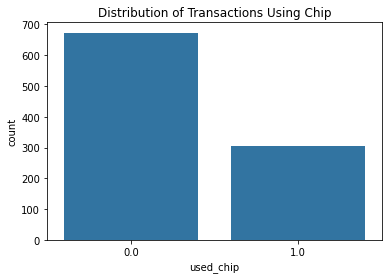

In [12]:
# Create a count plot for the 'used_chip' column
sns.countplot(x='used_chip', data=data_cleaned)

# Adding a title to the plot
plt.title('Distribution of Transactions Using Chip')

# Display the plot
plt.show()

**Prompt:**
make a count plot of online_order

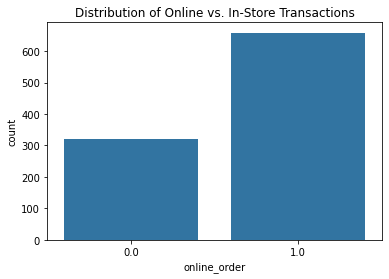

In [13]:
# Create a count plot for the 'online_order' column
sns.countplot(x='online_order', data=data_cleaned)

# Adding a title to the plot
plt.title('Distribution of Online vs. In-Store Transactions')

# Display the plot
plt.show()

**Prompt:**
make a histogram of distance_from_last_transaction

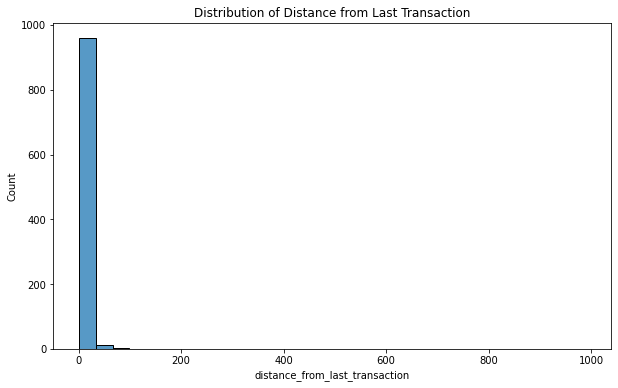

In [14]:
# Create a histogram for the 'distance_from_last_transaction' column
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['distance_from_last_transaction'], bins=30)

# Adding a title to the plot
plt.title('Distribution of Distance from Last Transaction')

# Display the plot
plt.show()

**Prompt:**
make a histogram of ratio_to_median_purchase_price

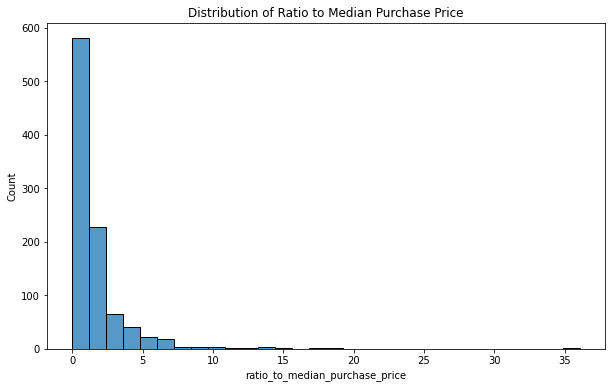

In [15]:
# Create a histogram for the 'ratio_to_median_purchase_price' column
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['ratio_to_median_purchase_price'], bins=30)

# Adding a title to the plot
plt.title('Distribution of Ratio to Median Purchase Price')

# Display the plot
plt.show()

**Prompt:**
make a histogram of distance_from_home

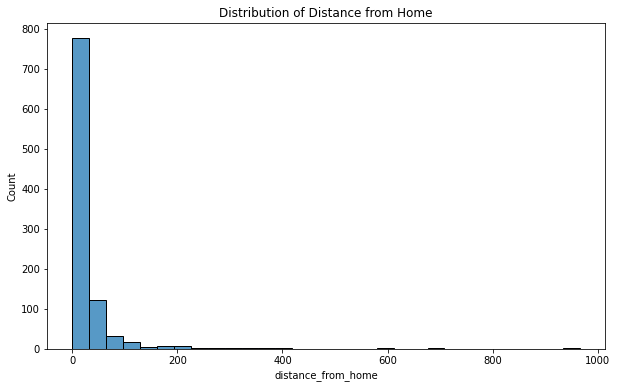

In [16]:
# Create a histogram for the 'distance_from_home' column
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['distance_from_home'], bins=30)

# Adding a title to the plot
plt.title('Distribution of Distance from Home')

# Display the plot
plt.show()

**Prompt:**
the next section is about better visualizations

# Better Visualizations  

**Prompt:**
write a sentence about wanting to look at fraudulent activity with each variable

In this section, we aim to explore how each variable relates to fraudulent activity by visualizing the distribution of features specifically for fraudulent and non-fraudulent transactions.

**Prompt:**
create a count plot of used_pin_number colored green and red for fraud that has a title, axes labels, and a legend

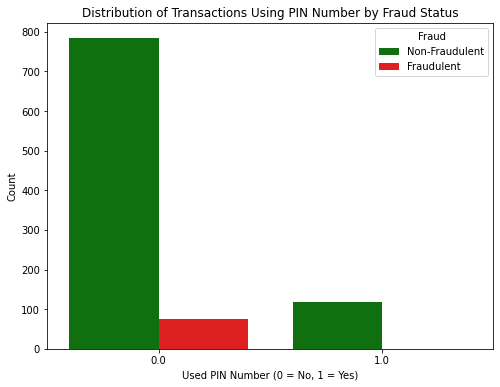

In [17]:
# Create a count plot for the 'used_pin_number' column, colored by 'fraud'
plt.figure(figsize=(8, 6))
sns.countplot(x='used_pin_number', hue='fraud', data=data_cleaned, palette={0: 'green', 1: 'red'})

# Adding a title and labels
plt.title('Distribution of Transactions Using PIN Number by Fraud Status')
plt.xlabel('Used PIN Number (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Adding a legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Display the plot
plt.show()

**Prompt:**
create a percentage chart of used_pin_number colored green and red for fraud that has a title, axes labels, and a legend

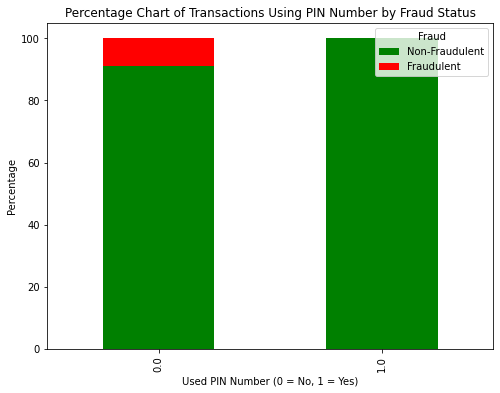

In [18]:
# Calculate the percentage distribution for each fraud status within 'used_pin_number'
counts = data_cleaned.groupby(['used_pin_number', 'fraud']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
percentages.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))

# Adding a title and labels
plt.title('Percentage Chart of Transactions Using PIN Number by Fraud Status')
plt.xlabel('Used PIN Number (0 = No, 1 = Yes)')
plt.ylabel('Percentage')

# Adding a legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Display the plot
plt.show()

**Prompt:**
create a count plot and a percentage plot of repeat_retailer colored green and red for fraud that has a title, axes labels, and a legend

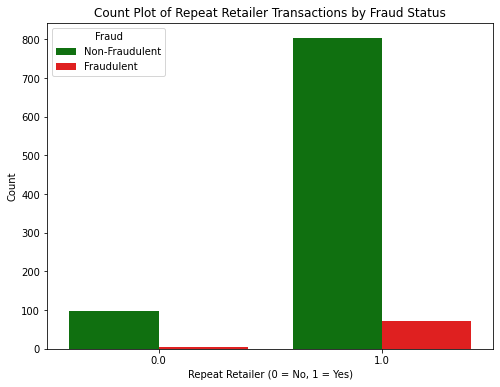

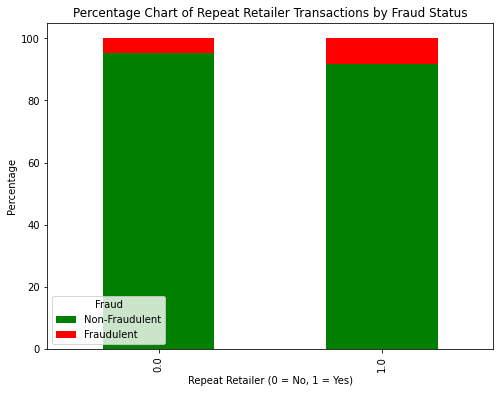

In [19]:
# Count plot for 'repeat_retailer' with fraud status
plt.figure(figsize=(8, 6))
sns.countplot(x='repeat_retailer', hue='fraud', data=data_cleaned, palette={0: 'green', 1: 'red'})

# Adding title and labels
plt.title('Count Plot of Repeat Retailer Transactions by Fraud Status')
plt.xlabel('Repeat Retailer (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Adding a legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Display the plot
plt.show()

# Calculate the percentage distribution for each fraud status within 'repeat_retailer'
counts = data_cleaned.groupby(['repeat_retailer', 'fraud']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
percentages.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))

# Adding title and labels
plt.title('Percentage Chart of Repeat Retailer Transactions by Fraud Status')
plt.xlabel('Repeat Retailer (0 = No, 1 = Yes)')
plt.ylabel('Percentage')

# Adding a legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Display the plot
plt.show()

**Prompt:**
create a count plot and a percentage plot of used_chip colored green and red for fraud that has a title, axes labels, and a legend

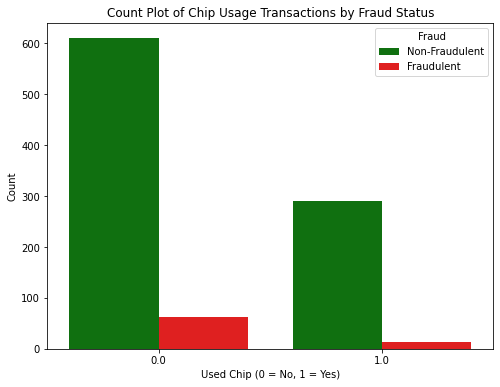

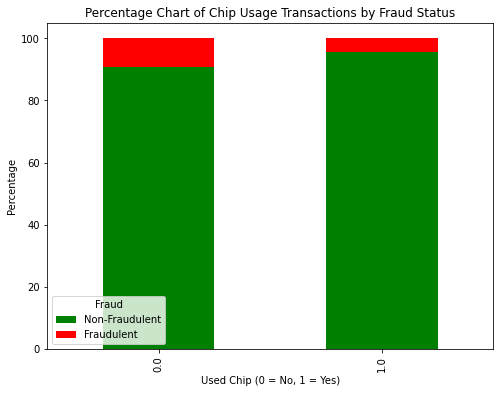

In [20]:
# Count plot for 'used_chip' with fraud status
plt.figure(figsize=(8, 6))
sns.countplot(x='used_chip', hue='fraud', data=data_cleaned, palette={0: 'green', 1: 'red'})

# Adding title and labels
plt.title('Count Plot of Chip Usage Transactions by Fraud Status')
plt.xlabel('Used Chip (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Adding a legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Display the plot
plt.show()

# Calculate the percentage distribution for each fraud status within 'used_chip'
counts = data_cleaned.groupby(['used_chip', 'fraud']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
percentages.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))

# Adding title and labels
plt.title('Percentage Chart of Chip Usage Transactions by Fraud Status')
plt.xlabel('Used Chip (0 = No, 1 = Yes)')
plt.ylabel('Percentage')

# Adding a legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Display the plot
plt.show()


**Prompt:**
create a count plot and a percentage plot of online_order colored green and red for fraud that has a title, axes labels, and a legend

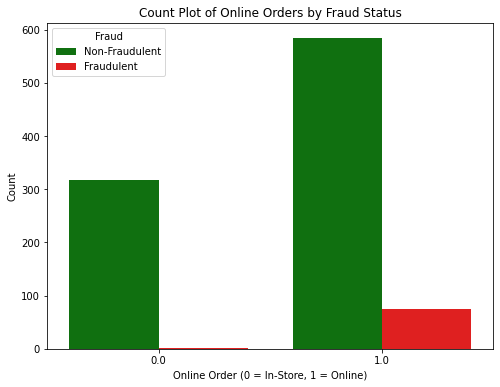

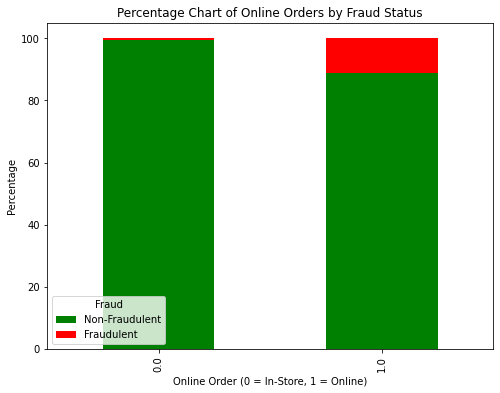

In [21]:
# Count plot for 'online_order' with fraud status
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', hue='fraud', data=data_cleaned, palette={0: 'green', 1: 'red'})

# Adding title and labels
plt.title('Count Plot of Online Orders by Fraud Status')
plt.xlabel('Online Order (0 = In-Store, 1 = Online)')
plt.ylabel('Count')

# Adding a legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Display the plot
plt.show()

# Calculate the percentage distribution for each fraud status within 'online_order'
counts = data_cleaned.groupby(['online_order', 'fraud']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
percentages.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))

# Adding title and labels
plt.title('Percentage Chart of Online Orders by Fraud Status')
plt.xlabel('Online Order (0 = In-Store, 1 = Online)')
plt.ylabel('Percentage')

# Adding a legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Display the plot
plt.show()

**Prompt:**
the next section is about bivariate visualizations

# Bivariate Visualizations  

**Prompt:**
write a couple sentences about using two variables and a colored scatterplot

In this section, we will explore the relationships between two variables using scatterplots, with fraud status represented by color. This approach allows us to visually identify patterns, clusters, or trends that differentiate fraudulent and non-fraudulent transactions based on the interaction of two features.

**Prompt:**
create a scatterplot using Seaborn of distance_from_home vs ratio_to_median_purchase_price colored green and red for fraud with a title and axes labels

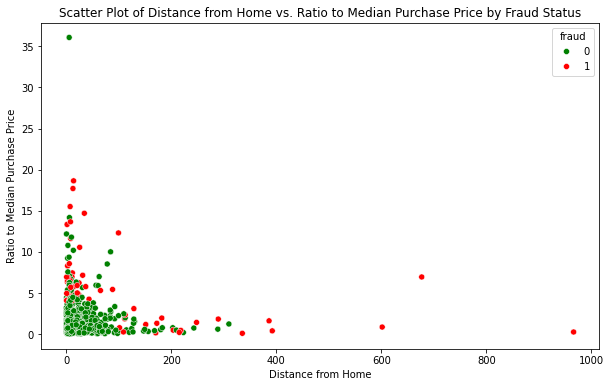

In [22]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='distance_from_home', 
    y='ratio_to_median_purchase_price', 
    hue='fraud', 
    data=data_cleaned, 
    palette={0: 'green', 1: 'red'}
)

# Adding title and labels
plt.title('Scatter Plot of Distance from Home vs. Ratio to Median Purchase Price by Fraud Status')
plt.xlabel('Distance from Home')
plt.ylabel('Ratio to Median Purchase Price')

# Display the plot
plt.show()

**Prompt:**
create a scatterplot using Seaborn of distance_from_home vs distance_from_last_transaction colored green and red for fraud with a title and axes labels

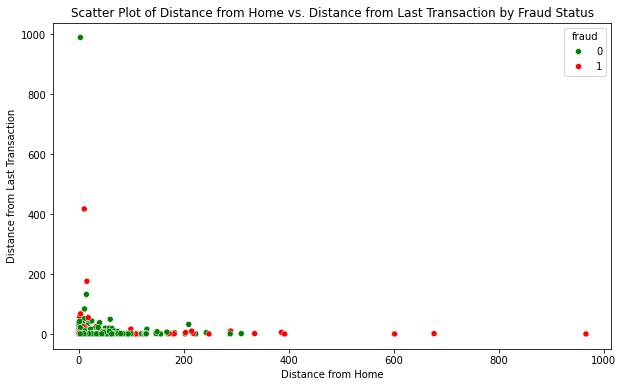

In [23]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='distance_from_home', 
    y='distance_from_last_transaction', 
    hue='fraud', 
    data=data_cleaned, 
    palette={0: 'green', 1: 'red'}
)

# Adding title and labels
plt.title('Scatter Plot of Distance from Home vs. Distance from Last Transaction by Fraud Status')
plt.xlabel('Distance from Home')
plt.ylabel('Distance from Last Transaction')

# Display the plot
plt.show()

**Prompt:**
create a scatterplot using Seaborn of distance_from_last_transaction vs ratio_to_mean_purchase_price colored green and red for fraud with a title and axes labels

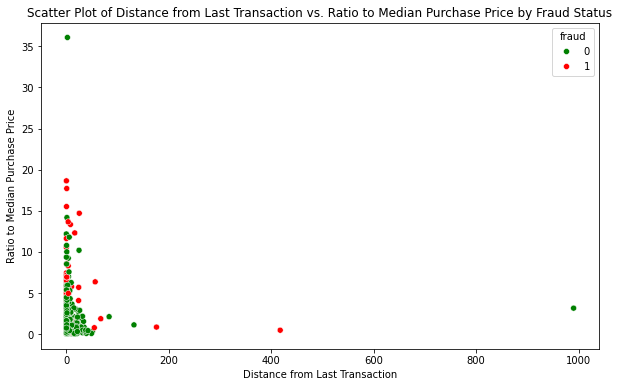

In [24]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='distance_from_last_transaction', 
    y='ratio_to_median_purchase_price', 
    hue='fraud', 
    data=data_cleaned, 
    palette={0: 'green', 1: 'red'}
)

# Adding title and labels
plt.title('Scatter Plot of Distance from Last Transaction vs. Ratio to Median Purchase Price by Fraud Status')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Ratio to Median Purchase Price')

# Display the plot
plt.show()

**Prompt:**
the next section is asking if we can predict a transaction as fraud

# Predicting Fraudulent Transactions  

**Prompt:**
write  a couple sentences that talk about using 20% of our data for predictions and the rest of our data for training

In this analysis, we will split our data into two sets: 80% will be used for training the model, while the remaining 20% will be reserved for testing and making predictions. The training data will be stored as X_train for the features and y_train for the target variable.

**Prompt:**
use fraud as the target variable and split the data into stratified train and test splits with a random seed

In [25]:
# Define the features (X) and target (y)
X = data_cleaned.drop(columns=['fraud'])
y = data_cleaned['fraud']

# Split the data into stratified train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Prompt:**
tell me how I can print out a variable in a notebook

In [26]:
#To print out a variable in a Jupyter Notebook, you can simply write the variable's name in a cell and run it
X_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
954,39.904167,0.367448,0.260833,1.0,1.0,0.0,1.0
143,2.660649,0.657162,3.837860,1.0,0.0,0.0,1.0
643,48.902727,0.205816,1.307000,1.0,0.0,1.0,0.0
15,179.665148,0.120920,0.535640,1.0,1.0,1.0,1.0
793,676.702348,1.209733,6.948586,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
685,5.916343,5.099247,0.419779,1.0,0.0,0.0,0.0
722,23.517527,3.513485,0.241444,1.0,0.0,0.0,0.0
173,3.273426,1.056948,1.694281,1.0,0.0,0.0,1.0
499,7.387696,1.598827,0.847218,1.0,0.0,0.0,1.0


**Prompt:**
I want to print y_train in my notebook

In [27]:
y_train

954    0
143    0
643    0
15     0
793    1
      ..
685    0
722    0
173    0
499    0
593    0
Name: fraud, Length: 781, dtype: int64

**Prompt:**
print the testing data in the notebook

In [28]:
X_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
782,0.701100,0.540487,1.754568,0.0,0.0,0.0,1.0
51,43.281314,3.367793,0.676058,1.0,1.0,1.0,1.0
197,4.586564,3.365070,2.454288,1.0,0.0,0.0,0.0
550,4.403263,0.173726,0.641169,1.0,0.0,0.0,0.0
412,965.910612,0.023604,0.257908,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
436,6.498016,0.228995,0.171750,1.0,0.0,0.0,0.0
868,9.258344,0.633609,0.066744,1.0,1.0,0.0,1.0
65,17.797888,1.395508,2.880479,1.0,1.0,0.0,0.0
743,5.599947,2.477098,5.956153,1.0,0.0,0.0,0.0


In [29]:
y_test

782    0
51     0
197    0
550    0
412    1
      ..
436    0
868    0
65     0
743    0
390    0
Name: fraud, Length: 196, dtype: int64

**Prompt:**
the next section is about a model that always predicts not fraud. give me a title and a sentence description about this section

### Model That Always Predicts Non-Fraud  

In this section, we will create a model that always predicts transactions as non-fraudulent, which will help us understand the minimum performance level.

**Prompt:**
make the model that never predicts fraud and print the first 100 rows

In [30]:
# Create a model that always predicts non-fraud (0)
y_pred_non_fraud = [0] * len(y_test)

# Print the first 100 rows of the predictions
print("First 100 predictions (Always Non-Fraud):")
print(y_pred_non_fraud[:100])

First 100 predictions (Always Non-Fraud):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Basic KNN Model

**Prompt:**
make a knn model, predict on the test set, and print the first 100 predicitons

In [31]:
# Initialize the KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn.predict(X_test)

# Print the first 100 predictions
print("First 100 KNN predictions (with 3 neighbors):")
print(knn_predictions[:100])

First 100 KNN predictions (with 3 neighbors):
[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


**Prompt:**
the next section is evaluating the model. give a title and a sentence about the accuracy of the never fraud model

### Evaluating the Model

In this section, we will evaluate the accuracy of the "never fraud" model, which always predicts non-fraudulent transactions. This model achieves an accuracy of 90%.

**Prompt:**
create a confusion matrix, a Seaborn heat map, and a classification report for the never fraud model

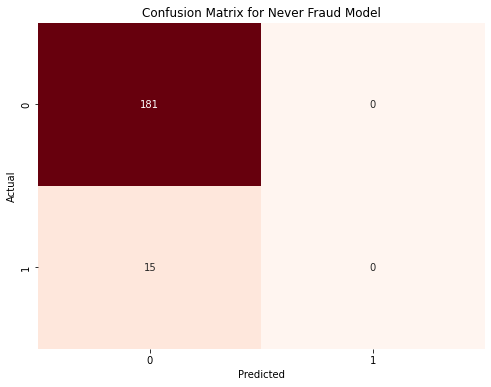

Classification Report for Never Fraud Model:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       181
           1       0.00      0.00      0.00        15

    accuracy                           0.92       196
   macro avg       0.46      0.50      0.48       196
weighted avg       0.85      0.92      0.89       196



/home/jupyter-kcreek/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-kcreek/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-kcreek/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_non_fraud)

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix for Never Fraud Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("Classification Report for Never Fraud Model:")
print(classification_report(y_test, y_pred_non_fraud))


**Prompt:**
create a confusion matrix, a Seaborn heat map, and a classification report for the knn model

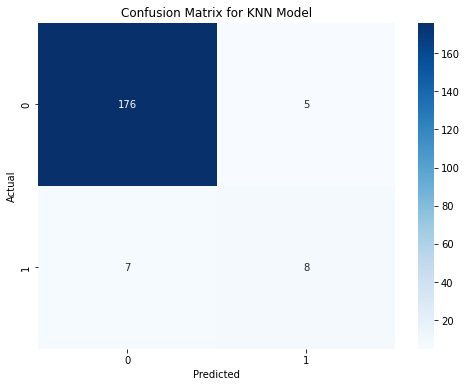

Classification Report for KNN Model:
              precision    recall  f1-score   support

   Non-Fraud       0.96      0.97      0.97       181
       Fraud       0.62      0.53      0.57        15

    accuracy                           0.94       196
   macro avg       0.79      0.75      0.77       196
weighted avg       0.94      0.94      0.94       196



In [33]:
# Generate the confusion matrix for the KNN model
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate and print the classification report for the KNN model
knn_class_report = classification_report(y_test, knn_predictions, target_names=['Non-Fraud', 'Fraud'])
print("Classification Report for KNN Model:")
print(knn_class_report)

**Prompt:**
the next section is comparing model performance

### Comparing Model Performance

**Prompt:**
calculate the metrics for the never fraud model and the knn model

In [34]:
# Calculate metrics for the "never fraud" model
accuracy_never_fraud = accuracy_score(y_test, y_pred_non_fraud)
precision_never_fraud = precision_score(y_test, y_pred_non_fraud, zero_division=0)
recall_never_fraud = recall_score(y_test, y_pred_non_fraud, zero_division=0)
f1_never_fraud = f1_score(y_test, y_pred_non_fraud, zero_division=0)

# Calculate metrics for the KNN model
accuracy_knn = accuracy_score(y_test, knn_predictions)
precision_knn = precision_score(y_test, knn_predictions)
recall_knn = recall_score(y_test, knn_predictions)
f1_knn = f1_score(y_test, knn_predictions)

**Prompt:**
make a bar plot that compares the metrics for the never fraud plot with the metrics for the knn plot but put the metrics into a data frame before plotting

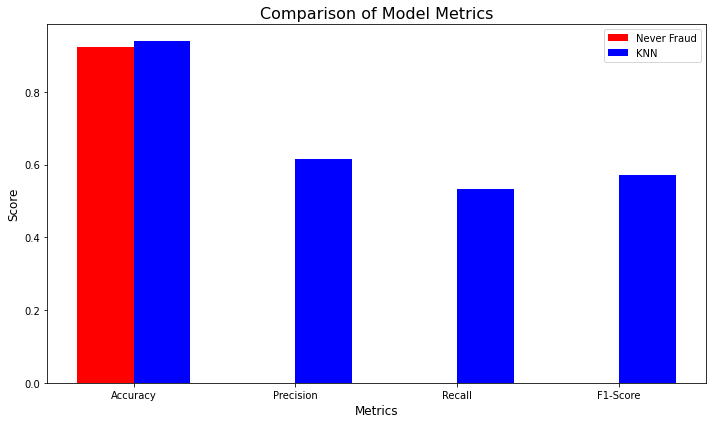

In [35]:
# Create a DataFrame with metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Never Fraud': [accuracy_never_fraud, precision_never_fraud, recall_never_fraud, f1_never_fraud],
    'KNN': [accuracy_knn, precision_knn, recall_knn, f1_knn]
})

# Plot the metrics
x = range(len(metrics_df['Metric']))  # Label locations
width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))
plt.bar([pos - width/2 for pos in x], metrics_df['Never Fraud'], width, label='Never Fraud', color='red')
plt.bar([pos + width/2 for pos in x], metrics_df['KNN'], width, label='KNN', color='blue')

# Add titles and labels
plt.title('Comparison of Model Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(x, metrics_df['Metric'], fontsize=10)
plt.legend(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()